**K Means Clustering, Hierarchial Clustering and DBSCAN Implementations**

**Mall Customer Segmentation: Market Basket Analysis**

In [1]:
# Importing the Required Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import plotting
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns  #Python library for Vidualization

import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings('ignore')
py.offline.init_notebook_mode(connected=True)
plt.style.use('fivethirtyeight')


In [2]:
# For Visualizations

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


import seaborn as sns
plt.style.use('ggplot')

In [3]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

In [4]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
import missingno as msno
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

# Clustering model library
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram

In [5]:
# Importing the dataset
dataset = pd.read_csv('/content/Mall_Customers.csv')

In [6]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
dataset.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

**Renaming Columns**

In [8]:
dataset.rename(index=str,columns={'Annual Income (k$)':'Income',
                                  'Spending Score (1-100)':'Score'},inplace = True)
dataset.head(5)

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Genre       200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [10]:
print('This dataset contains ',dataset.shape[0],'rows')
print('This dataset contains ',dataset.shape[1],'columns')

This dataset contains  200 rows
This dataset contains  5 columns


In [11]:
dataset.iloc[:,1:].corr()

,Age,Income,Score
Age,1.000000,-0.012398,-0.327227
Income,-0.012398,1.000000,0.009903
Score,-0.327227,0.009903,1.000000


**Dropping the CustomerID Column**

In [12]:
# Dropping the customer ID Column

dataset.drop('CustomerID',axis=1,inplace = True)

In [13]:
print("Mean of Annual Income (k$) of Female:",dataset['Income'].loc[dataset['Genre'] == 'Female'].mean())
print("Mean of Annual Income (k$) of Male:",dataset['Income'].loc[dataset['Genre'] == 'Male'].mean())

Mean of Annual Income (k$) of Female: 59.25
Mean of Annual Income (k$) of Male: 62.22727272727273


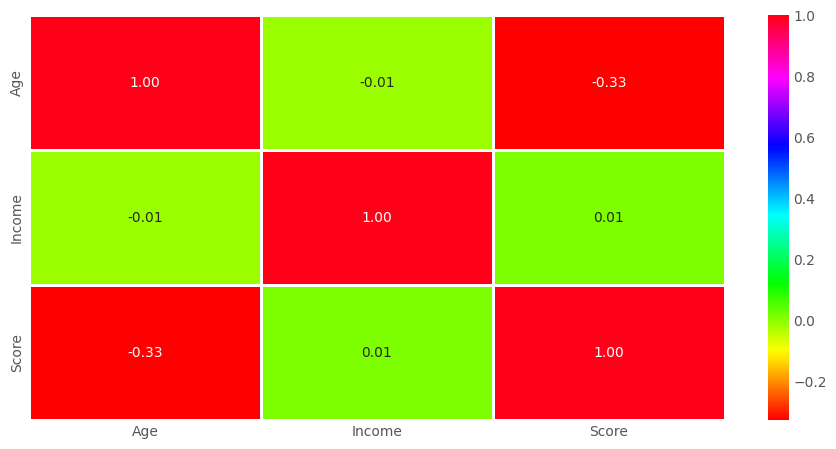

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(),annot=True,cmap='hsv',fmt='.2f',linewidths=2)
plt.show()

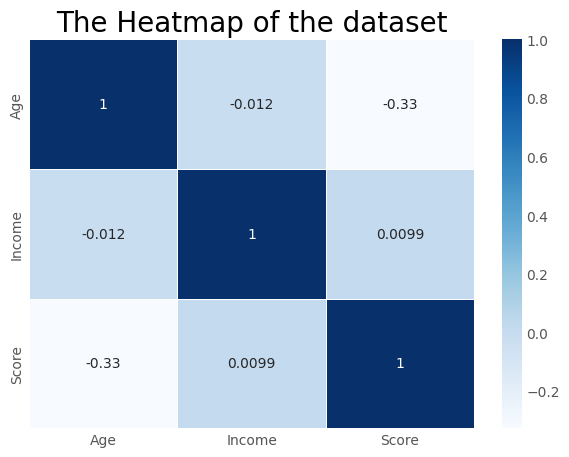

In [15]:
hm = sns.heatmap(dataset.iloc[:,1:5].corr(),annot=True,linewidths=0.5,cmap='Blues')
hm.set_title(label='The Heatmap of the dataset',fontsize=20)
hm
plt.ioff()
plt.show()

*Annual Income with Spending Score forms together an interesting picture, look at it later. Age and Annual Income distribution don't seems like normal. They are both shifted to left. Spending Score, at first glance, has too large tails to be normal. But remember, that these conclusions based on histograms, and they can change very high by switch number of bins. So, plot in addition kdeplot from seaborn:*

**Finding the Relation between Age,Annual income,and Spending Score**

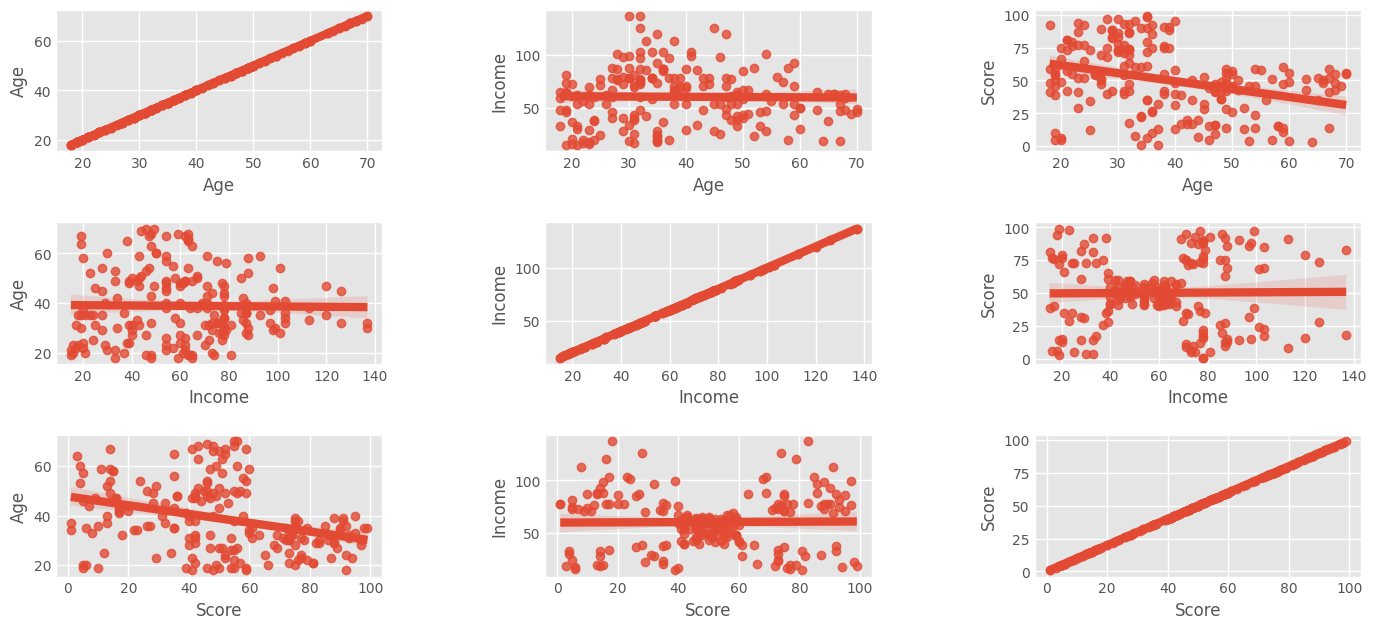

In [16]:
plt.figure(1,figsize=(15,7))
n=0
for x in ['Age','Income','Score']:
  for y in ['Age','Income','Score']:
    n += 1
    plt.subplot(3,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.regplot(x=x,y=y,data=dataset)
    plt.ylabel(y.split()[0]+''+y.split()[1] if len(y.split())>1 else y)
plt.show()

In [17]:
dataset.groupby('Genre').mean()

,Age,Income,Score
Genre,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


**Checking for Duplicate**

In [18]:
print(sum(dataset.duplicated()))
dataset = dataset.drop_duplicates()

0


**Exploring the Age Column for Further Analysis**

In [19]:
dataset['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [20]:
print(len(dataset.Age.unique()))

51


In [21]:
dataset.Age.value_counts()[:10]

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
Name: Age, dtype: int64

In [22]:
# Looking at the Age Colums values
dataset['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

**Creating an Age Range Category**

In [23]:
# Creating new category
bins = [18,22,50,70]
labels = ['Young','Adult','Senior']
dataset['Age Range'] = pd.cut(dataset['Age'],bins=bins,labels=labels,right=False)

dataset.head()

,Genre,Age,Income,Score,Age Range
0,Male,19,15,39,Young
1,Male,21,15,81,Young
2,Female,20,16,6,Young
3,Female,23,16,77,Adult
4,Female,31,17,40,Adult


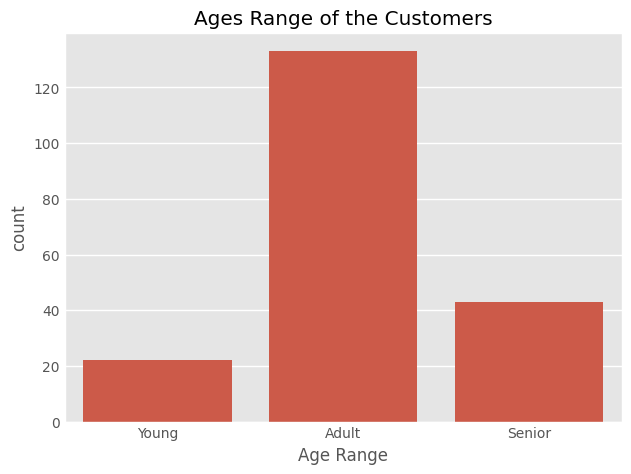

In [24]:
sns.countplot(x=dataset['Age Range'],data=dataset)
plt.title('Ages Range of the Customers')
plt.show()

In [25]:
dataset.Age.value_counts()[:3]

32    11
35     9
19     8
Name: Age, dtype: int64

In [26]:
AnnualIncome_32 = 0
AnnualIncome_35 = 0
AnnualIncome_19 = 0

AnnualIncome_32 = sum(dataset[dataset['Age']==32].Income)
AnnualIncome_35 = sum(dataset[dataset['Age']==35].Income)
AnnualIncome_19 = sum(dataset[dataset['Age']==19].Income)


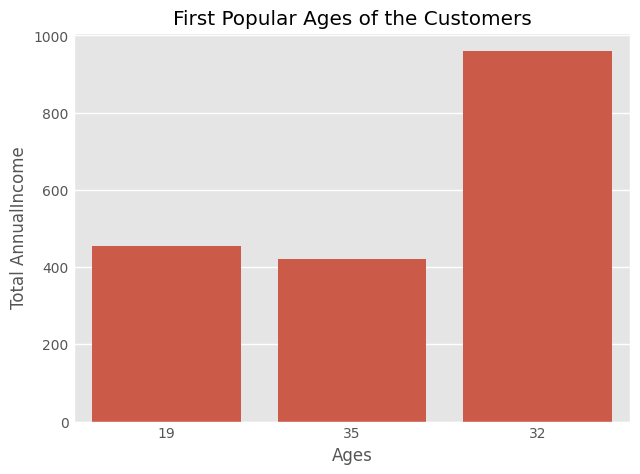

In [27]:
plt.title('First Popular Ages of the Customers')
sns.barplot(x=['19','35','32'],y=[AnnualIncome_19,AnnualIncome_35,AnnualIncome_32])
plt.xlabel('Ages')
plt.ylabel('Total AnnualIncome')
plt.show()

**Exploring the Gender Column**

In [28]:
# Show Genre Column Unique

dataset.Genre.unique()

array(['Male', 'Female'], dtype=object)

In [29]:
# Show genre value counts
dataset.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

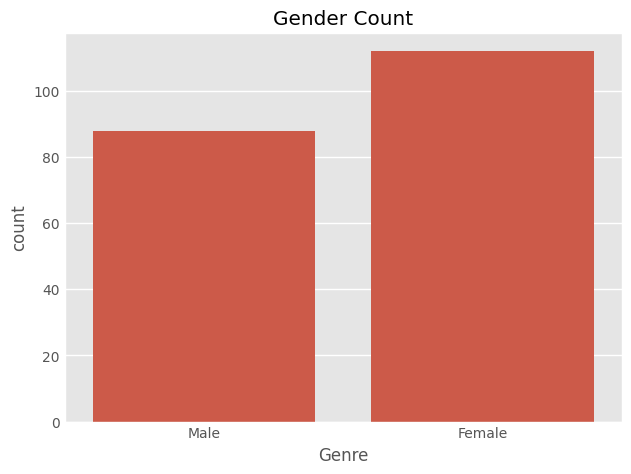

In [30]:
# Visualizing the Genre Column

sns.countplot(x=dataset.Genre,data = dataset)
plt.title('Gender Count')
plt.show()

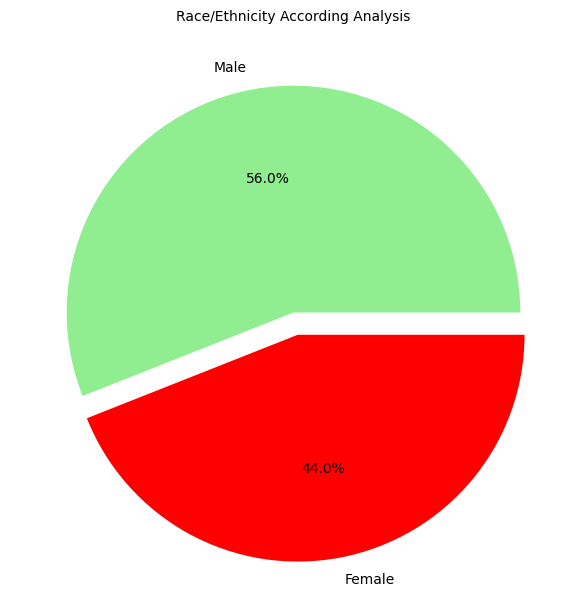

In [31]:
labels=dataset.Genre.unique()
colors=['lightgreen','red']
explode=[0,0.1]
values=dataset.Genre.value_counts().values

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Race/Ethnicity According Analysis',color='black',fontsize=10)
plt.show()

In [32]:
#Male Age
print('Max  :',max(dataset[dataset['Genre']=='Male'].Age))
print('Min  :',min(dataset[dataset['Genre']=='Male'].Age))
print('Mean :',np.mean(dataset[dataset['Genre']=='Male'].Age))
print('Std  :',np.std(dataset[dataset['Genre']=='Male'].Age))

Max  : 70
Min  : 18
Mean : 39.80681818181818
Std  : 15.426407372472944


In [33]:
#Female Age
print('Max  :',max(dataset[dataset['Genre']=='Female'].Age))
print('Min  :',min(dataset[dataset['Genre']=='Female'].Age))
print('Mean :',np.mean(dataset[dataset['Genre']=='Female'].Age))
print('Std  :',np.std(dataset[dataset['Genre']=='Female'].Age))

Max  : 68
Min  : 18
Mean : 38.098214285714285
Std  : 12.587522039581055


**Exploring the Annual Income Column for Further Analysis**

In [34]:
#Male Income
print('Max  :',max(dataset[dataset['Genre']=='Male'].Income))
print('Min  :',min(dataset[dataset['Genre']=='Male'].Income))
print('Mean :',np.mean(dataset[dataset['Genre']=='Male'].Income))
print('Std  :',np.std(dataset[dataset['Genre']=='Male'].Income))

Max  : 137
Min  : 15
Mean : 62.22727272727273
Std  : 26.486586344758496


In [35]:
#Female Age
print('Max  :',max(dataset[dataset['Genre']=='Female'].Income))
print('Min  :',min(dataset[dataset['Genre']=='Female'].Income))
print('Mean :',np.mean(dataset[dataset['Genre']=='Female'].Income))
print('Std  :',np.std(dataset[dataset['Genre']=='Female'].Income))

Max  : 126
Min  : 16
Mean : 59.25
Std  : 25.8955663607278


In [36]:
#Male SpendingScore
print('Max  :',max(dataset[dataset['Genre']=='Male'].Score))
print('Min  :',min(dataset[dataset['Genre']=='Male'].Score))
print('Mean :',np.mean(dataset[dataset['Genre']=='Male'].Score))
print('Std  :',np.std(dataset[dataset['Genre']=='Male'].Score))

Max  : 97
Min  : 1
Mean : 48.51136363636363
Std  : 27.737812359739767


In [37]:
#Female SpendingScore
print('Max  :',max(dataset[dataset['Genre']=='Female'].Score))
print('Min  :',min(dataset[dataset['Genre']=='Female'].Score))
print('Mean :',np.mean(dataset[dataset['Genre']=='Female'].Score))
print('Std  :',np.std(dataset[dataset['Genre']=='Female'].Score))

Max  : 99
Min  : 5
Mean : 51.526785714285715
Std  : 24.00705246880166


**Decoding the Categorical Variable**


In [38]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(dataset['Genre'].values)
dataset['Genre'] = integer_encoded
dataset.head(7)

,Genre,Age,Income,Score,Age Range
0,1,19,15,39,Young
1,1,21,15,81,Young
2,0,20,16,6,Young
3,0,23,16,77,Adult
4,0,31,17,40,Adult
5,0,22,17,76,Adult
6,0,35,18,6,Adult


**Numerical Features Distribution**

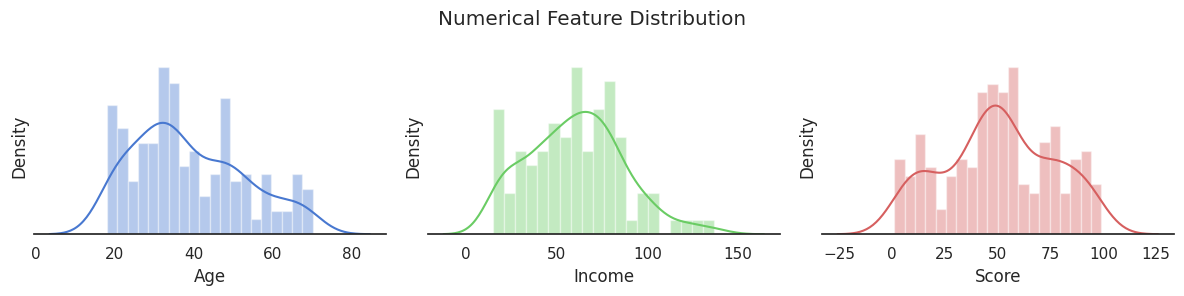

In [39]:
# Numerical features distribution
sns.set(style='white', palette='muted', color_codes=True)
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.despine(left=True)
axs[0] = sns.distplot(dataset['Age'], bins=20, ax=axs[0])
axs[1] = sns.distplot(dataset['Income'], bins=20, ax=axs[1], color='g')
axs[2] = sns.distplot(dataset['Score'], bins=20, ax=axs[2], color='r')

fig.suptitle('Numerical Feature Distribution')
plt.setp(axs, yticks=[])
plt.tight_layout()
plt.show()

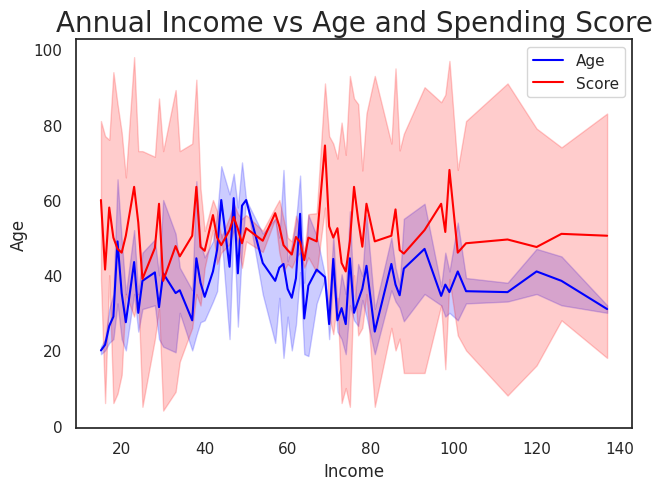

In [40]:
x = dataset['Income']
y = dataset['Age']
z = dataset['Score']

sns.lineplot(x='Income', y='Age', data=dataset, color='blue', label='Age')
sns.lineplot(x='Income', y='Score', data=dataset, color='red', label='Score')

plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()


**Pair Plot Visualization**

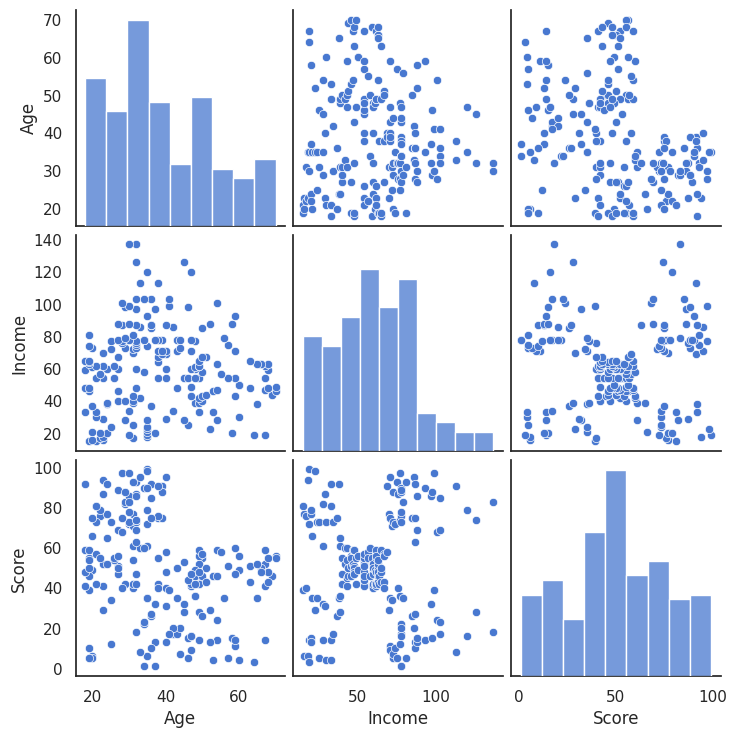

In [41]:
sns.pairplot(dataset[['Age','Income','Score']])
plt.show()

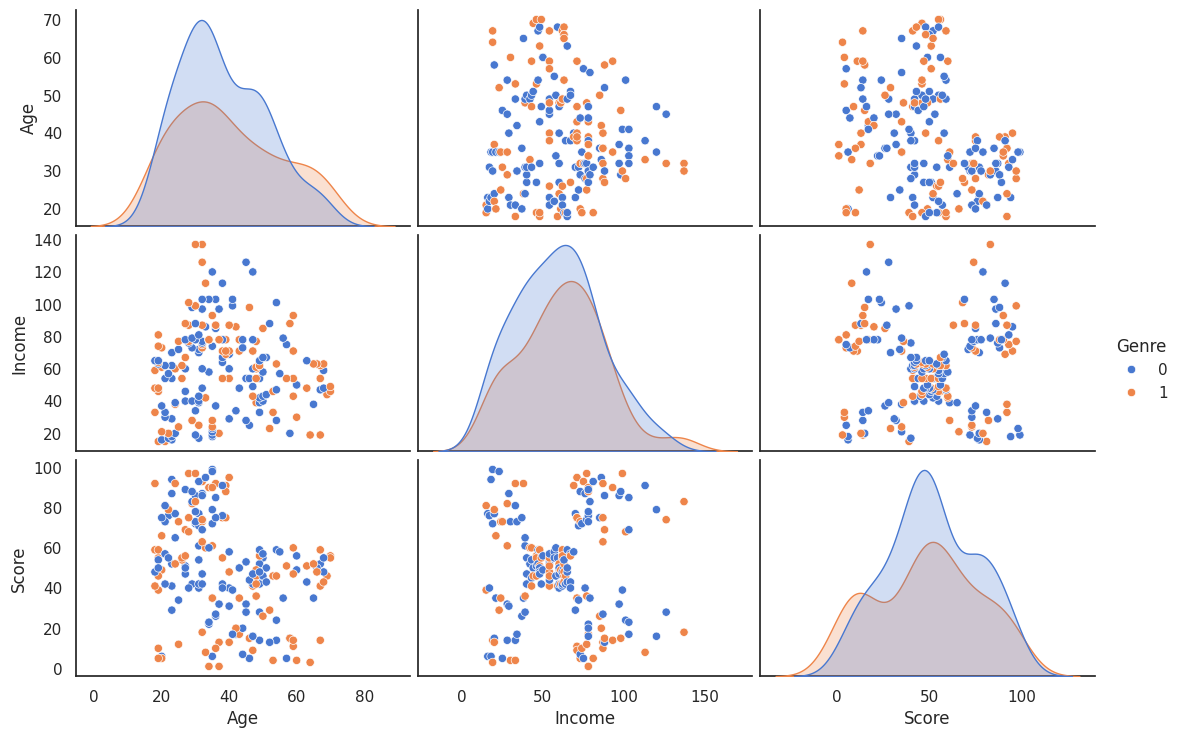

In [42]:
# Let's see our data in a detailed way with pairplot
sns.pairplot(dataset[['Genre','Age','Income','Score']],hue='Genre',aspect=1.5)
plt.show()

*From the above plot we see that gender has no direct relation to segmenting customers. That's why we can drop it and move on with other features which is why we will X parameter from now on.*

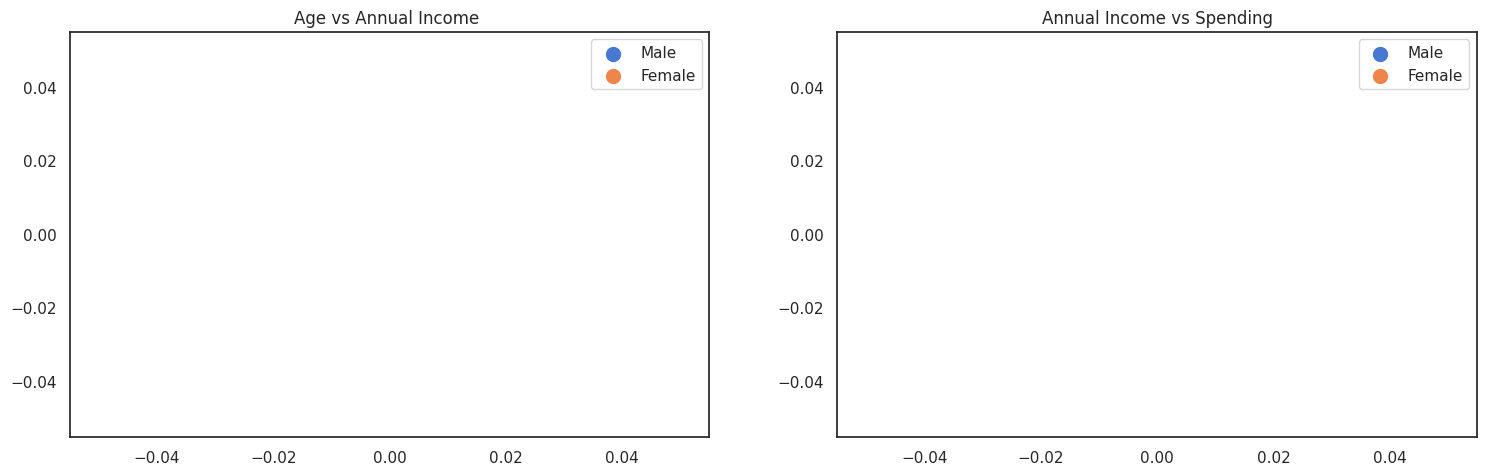

In [43]:


plt.figure(figsize=(25, 5))

# Plot 1
plt.subplot(1, 3, 1)
for gender in ['Male', 'Female']:
    subset = dataset[dataset['Genre'] == gender]
    plt.scatter(x='Age', y='Income', data=subset, label=gender, s=100)
plt.title('Age vs Annual Income ')
plt.legend()

# Plot 2
plt.subplot(1, 3, 2)
for gender in ['Male', 'Female']:
    subset = dataset[dataset['Genre'] == gender]
    plt.scatter(x='Income', y='Score', data=subset, s=100, label=gender)
plt.title('Annual Income vs Spending')
plt.legend()

plt.show()

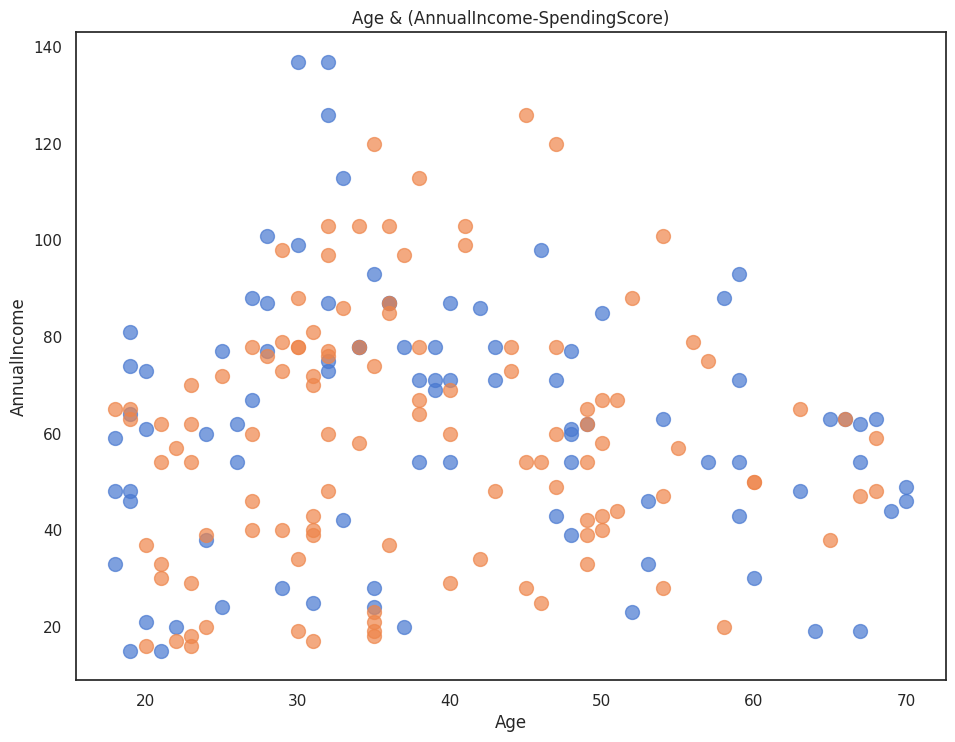

In [44]:
plt.figure(figsize=(10,8))
for gender in dataset.Genre.unique():
    plt.scatter(x='Age',y='Income',data=dataset[dataset['Genre']==gender],s=100,alpha=.7)
    plt.xlabel('Age')
    plt.ylabel('AnnualIncome')
    plt.title('Age & (AnnualIncome-SpendingScore)')
plt.show()

**Spending Score Based on Age**

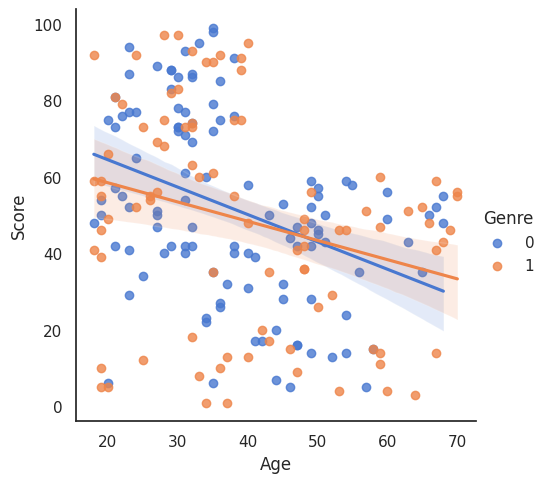

In [45]:
sns.lmplot(x='Age', y='Score', data=dataset,fit_reg=True,hue='Genre')
plt.show()

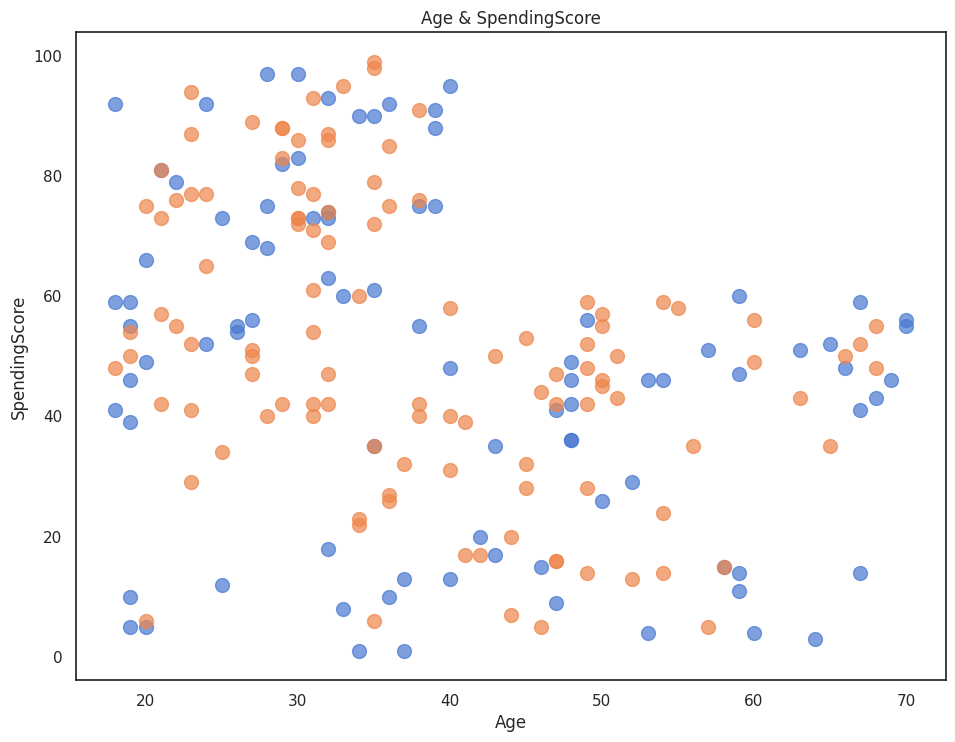

In [46]:
plt.figure(figsize=(10,8))
for gender in dataset.Genre.unique():
    plt.scatter(x='Age',y='Score',data=dataset[dataset['Genre']==gender],s=100,alpha=.7)
    plt.xlabel('Age')
    plt.ylabel('SpendingScore')
    plt.title('Age & SpendingScore')
plt.show()


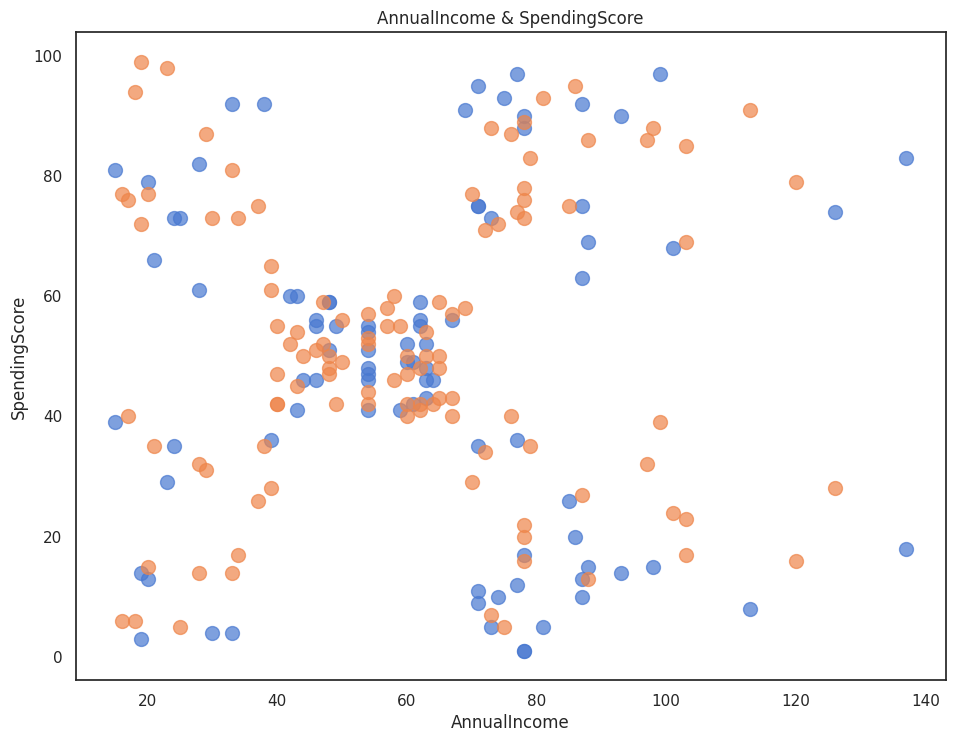

In [47]:
plt.figure(figsize=(10,8))
for gender in dataset.Genre.unique():
    plt.scatter(x='Income',y='Score',data=dataset[dataset['Genre']==gender],s=100,alpha=.7)
    plt.xlabel('AnnualIncome')
    plt.ylabel('SpendingScore')
    plt.title('AnnualIncome & SpendingScore')
plt.show()

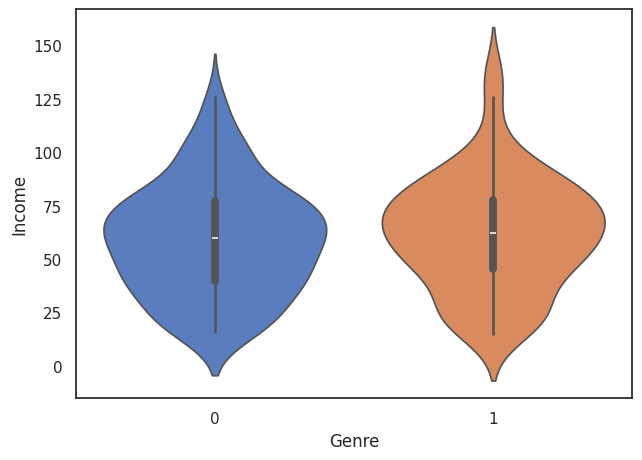

In [48]:
sns.violinplot(x="Genre", y="Income",data=dataset,palette='muted')
plt.show()

In [49]:
X = dataset.drop(['Genre','Age Range'],axis = 1)

from sklearn.decomposition import PCA
pca=PCA().fit(X)
print(pca.explained_variance_ratio_)
print()
print(X.columns.values.tolist())
print(pca.components_)

[0.45125272 0.44098465 0.10776263]

['Age', 'Income', 'Score']
[[-0.1889742   0.58864102  0.7859965 ]
 [ 0.1309652   0.80837573 -0.57391358]
 [ 0.97320957  0.00551667  0.22985365]]


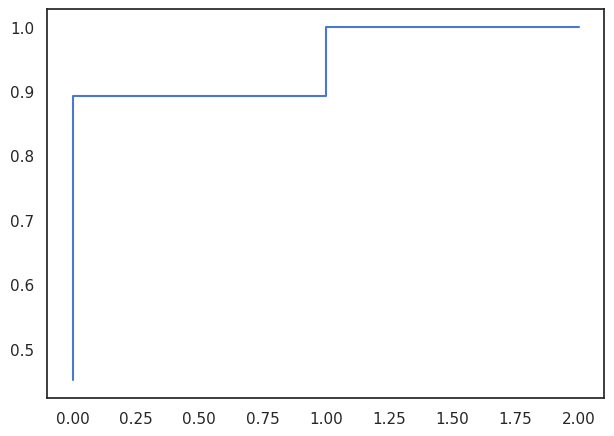

In [50]:
cumulative=np.cumsum(pca.explained_variance_ratio_)
plt.step([i for i in range(len(cumulative))],cumulative)
plt.show()

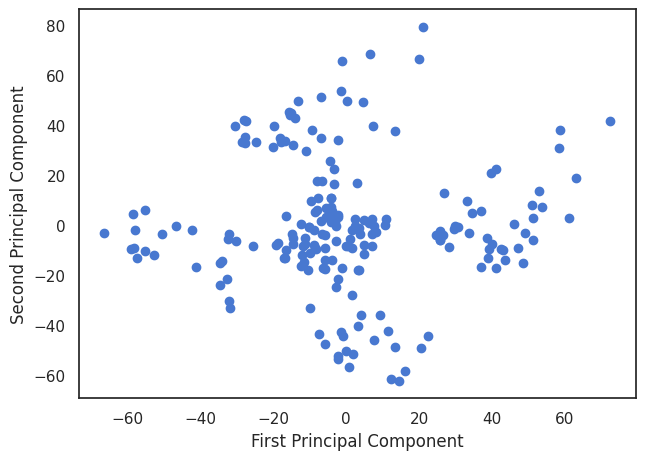

In [51]:
pca=PCA(n_components=2)
pca.fit(X)
reduced_data=pca.transform(X)
inverse_data=pca.inverse_transform(reduced_data)
plt.scatter(reduced_data[:,0],reduced_data[:,1],label='reduced')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [52]:
reduced_data=pd.DataFrame(reduced_data,columns=['Dim1','Dim2'])
reduced_data[:10]

,Dim1,Dim2
0,-31.870508,-33.001425
1,0.763397,-56.843865
2,-57.408726,-13.122936
3,-2.169896,-53.477905
4,-32.174920,-30.387005
5,-2.178278,-52.226581
6,-59.066057,-9.541707
7,12.369326,-61.617684
8,-66.315657,-3.213599
9,-5.656775,-47.266453


**Model Building Process**

**Segmentation 1: Using All the Features**

In [53]:
dataset_1 = dataset.iloc[:,1:4]
dataset_1.head(3)

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6


**The Model: K-Means Clustring**

*To get started with K-Means we will first have to figure out a good value for K and to do that we use the Elbow curve.*

*The curve has been drawn considering the value of K from 1 to 20*

**Using Elbow method to find the Optimal Cluster Number**

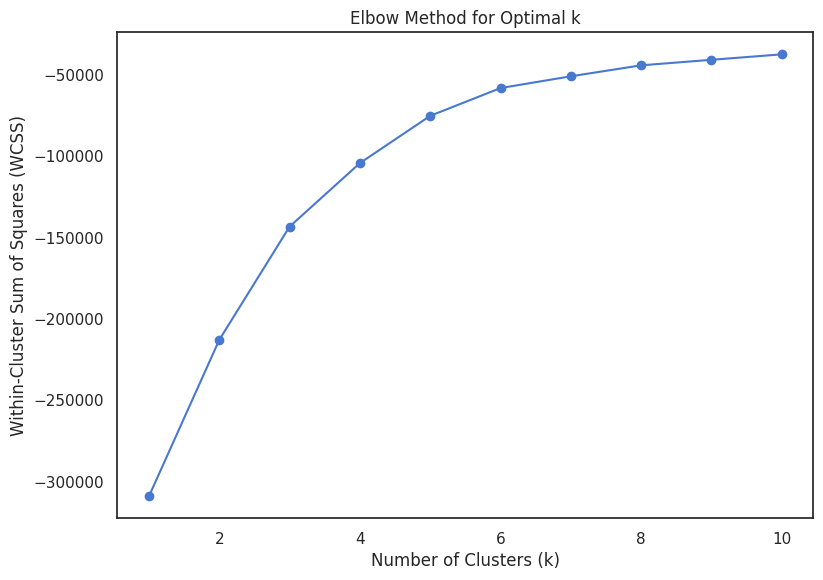

In [54]:
results = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    res = kmeans.fit(dataset_1)
    results.append(res.score(dataset_1))

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), results, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

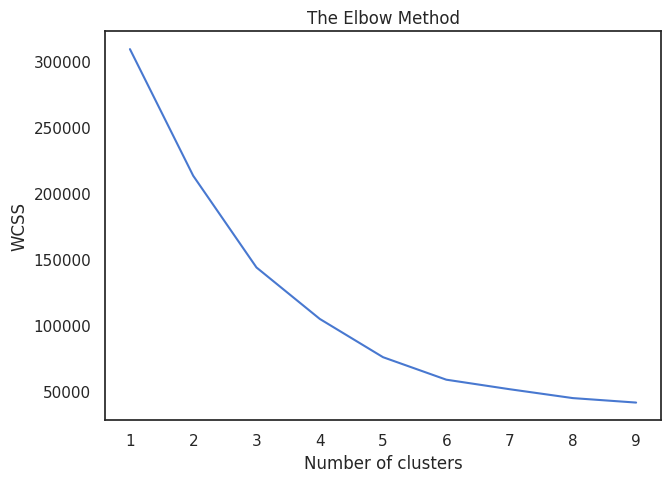

In [55]:

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(dataset_1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

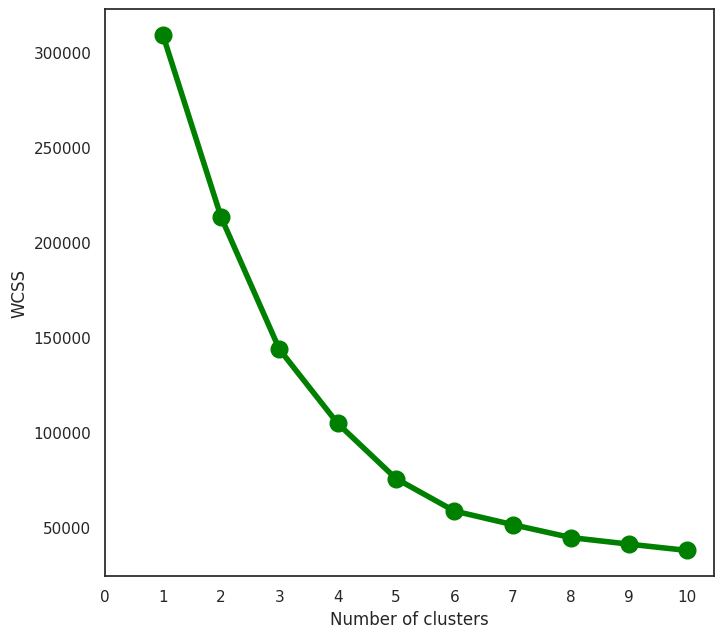

In [56]:
# find the optimal number of clusters using elbow method

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(dataset_1)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

*Seeing the Elbow Curve there is not a point with a clear elbow, so our clustering may not be mostly accurate using these features. Still, K=3 may give us the best possible result, considering all the features would help us to find the target audiences for gender specific or age specific products.*

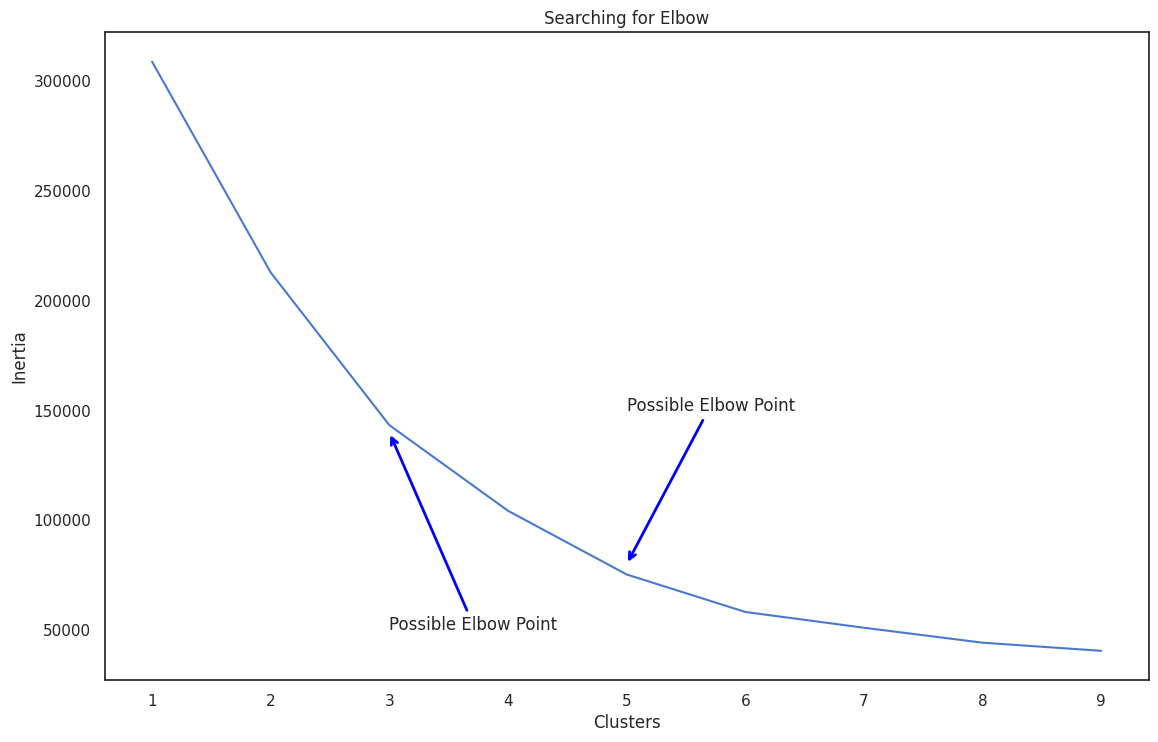

In [57]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(dataset_1)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

*Elbow method tells us to select the cluster when there is a significant change in inertia. As we can see from the graph, we can say this may be either 3 or 5. Let's see both results in graph and decide*

**Creating the Visual Plots**

In [58]:
dataset['Age Range'].replace({'Young':0,'Adult':1,'Senior':3},inplace=True)

In [59]:
dataset['Age Range'].unique()

[0, 1, 3, NaN]
Categories (3, int64): [0 < 1 < 3]

In [60]:
dataset_ne = dataset[['Income','Score','Age Range']]
dataset_1 = dataset_ne.iloc[:,0:3]

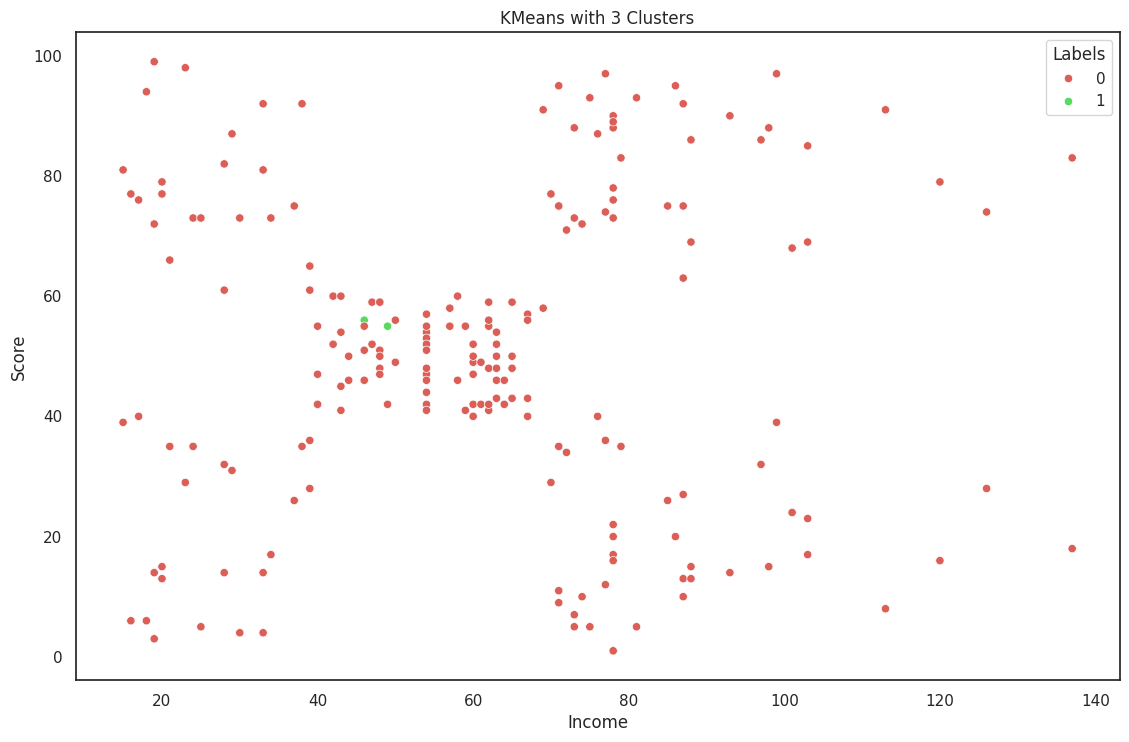

In [61]:

# 3 cluster
km3 = KMeans(n_clusters=3).fit(dataset_1)

dataset_1['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=dataset_1['Income'],y= dataset_1['Score'], hue=dataset_1['Labels'],
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

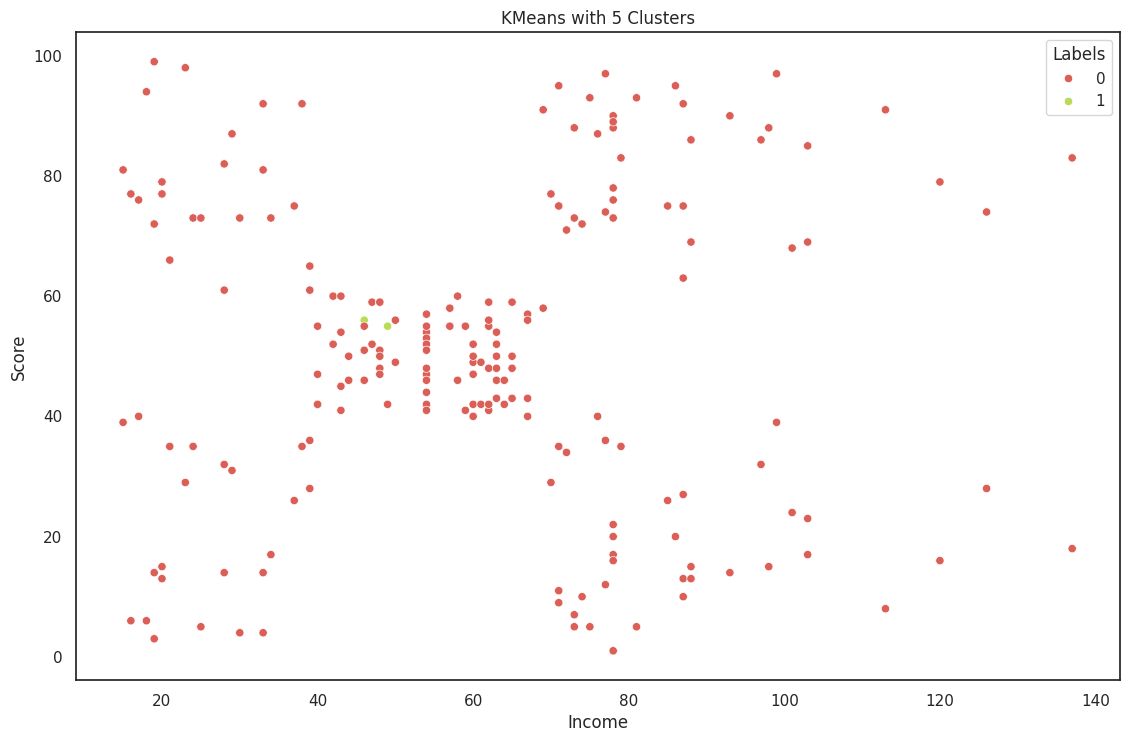

In [62]:
# Let's see with 5 Clusters
km5 = KMeans(n_clusters=5).fit(dataset_1)

dataset_1['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=dataset_1['Income'], y=dataset_1['Score'], hue=dataset_1['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

*By judging from the plots we could say that 5 cluster seems better than the 3 ones. As this is a unsupervised problem we can't really know for sure which one is the best in real life but by looking at the data it's safe to say that 5 would be our choice.*

**We can analyze our 5 clusters in detail now:**

*Label 0 is low income and low spending*

*Label 1 is high income and high spending*

*Label 2 is mid income and mid spending*

*Label 3 is high income and low spending*

*Label 4 is low income and high spending*

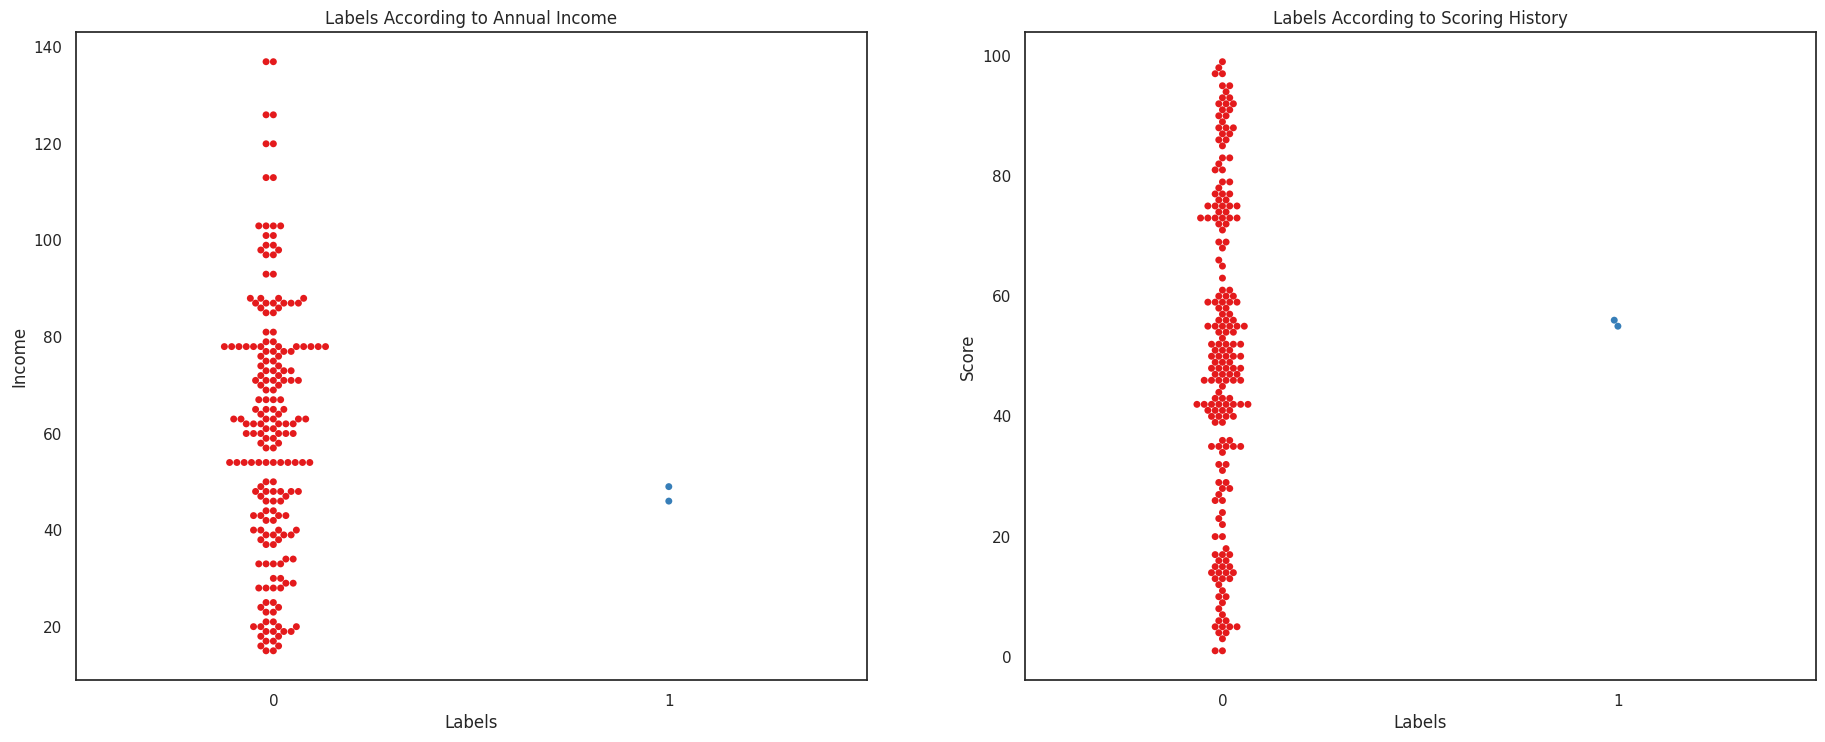

In [63]:
# You can choose a palette that suits your preference, such as 'Set1', 'Set2', 'Dark2', etc.
palette = 'Set1'

fig = plt.figure(figsize=(20, 8))

# Swarmplot for 'Income' with color-coded clusters
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=dataset_1, ax=ax, palette=palette)
ax.set_title('Labels According to Annual Income')

# Swarmplot for 'Score' with color-coded clusters
ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=dataset_1, ax=ax, palette=palette)
ax.set_title('Labels According to Scoring History')

plt.show()

**Applying K Means to the Dataset: Fitting the Model**

In [69]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
clusters=kmeans.fit_predict(dataset_1)

In [70]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [73]:
dataset_1['Cluster'] = clusters
dataset_1['Cluster'].value_counts()


1    123
2     39
0     38
Name: Cluster, dtype: int64

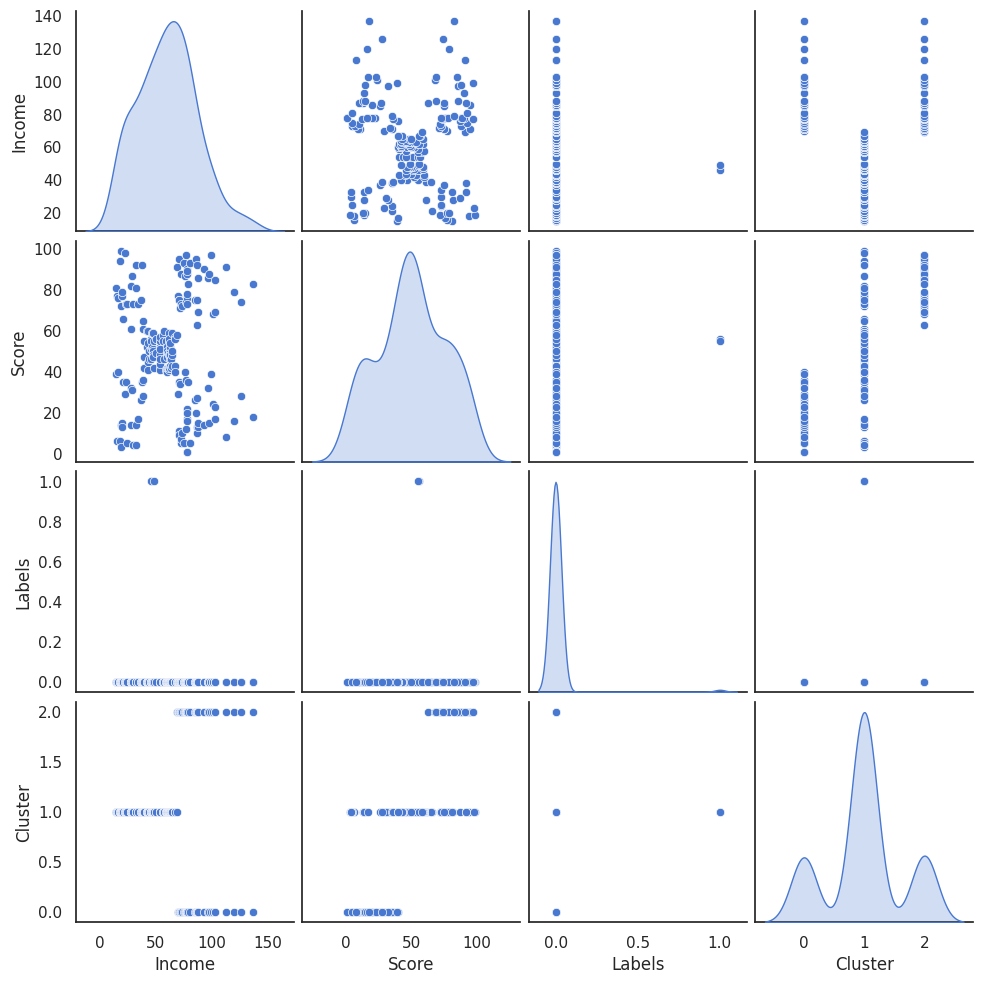

In [77]:
sns.pairplot(dataset_1[['Income','Score','Labels','Cluster']],diag_kind="kde")
plt.show()

** From the above visualization we have the following clusters**

*People with low income, but they spend across the range and they also have no specific age. As they can afford less, they are a good target for low cost products and discounts.*

*Middle aged people with high annual income and high spending score. This is the group that we want to target with most advertisement and product offerings. It also suggests that products for middle aged people will be a good idea.*

**Segmentation 2: Using only Annual Income and Spending Score**

*This gives us a good idea what we want to do with products and offers which are gender and age neutral.*

*We use the same analysis and model that we used in the first case.*

In [80]:
dataset_2 = dataset.iloc[:,1:4]
dataset_2.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


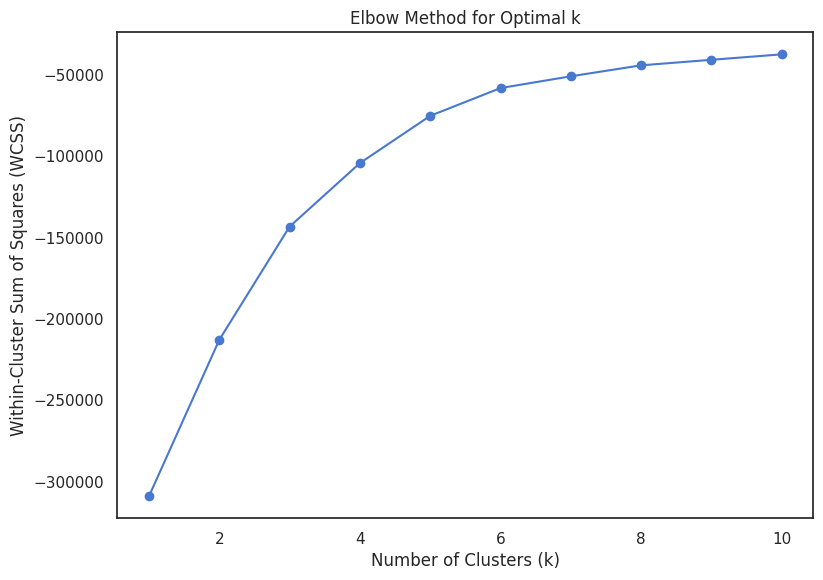

In [83]:
results = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    res = kmeans.fit(dataset_2)
    results.append(res.score(dataset_2))

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), results, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

**We notice that 5 will give us the best clustring**

In [84]:
## Fitting the Model to the Datasets

kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
clusters=kmeans.fit_predict(dataset_2)

In [98]:
dataset_2['clusters'] = clusters

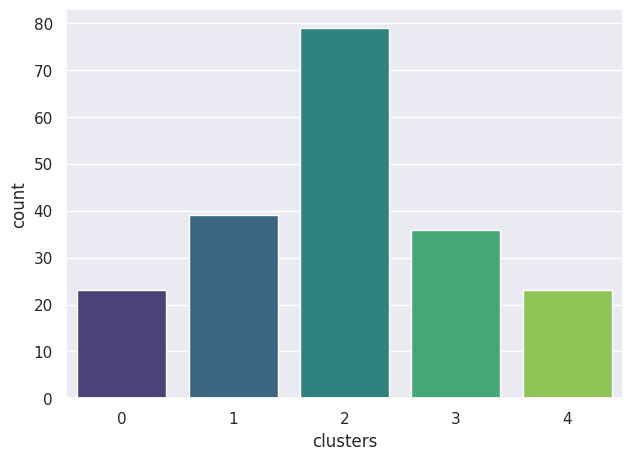

In [101]:
sns.countplot(x='clusters',data=dataset_2,palette='viridis')
plt.show()


*From the above countplot we can see that there are more number of customers in the cluster 2(green color). same colors are used to plot the clusters(In 3d scatter plot below).*

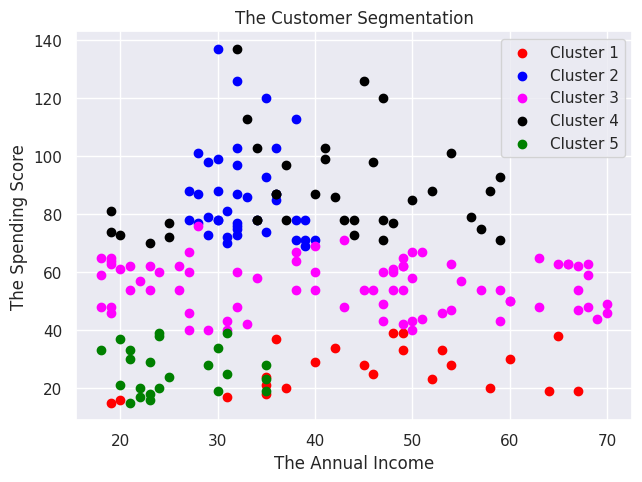

In [107]:
cluster_1 = dataset_2[clusters==0].iloc[:,0:2]
cluster_2 = dataset_2[clusters==1].iloc[:,0:2]
cluster_3 = dataset_2[clusters==2].iloc[:,0:2]
cluster_4 = dataset_2[clusters==3].iloc[:,0:2]
cluster_5 = dataset_2[clusters==4].iloc[:,0:2]

plt.scatter(cluster_1.iloc[:,0],cluster_1.iloc[:,1],c='red',label='Cluster 1')
plt.scatter(cluster_2.iloc[:,0],cluster_2.iloc[:,1],c='blue',label='Cluster 2')
plt.scatter(cluster_3.iloc[:,0],cluster_3.iloc[:,1],c='magenta',label='Cluster 3')
plt.scatter(cluster_4.iloc[:,0],cluster_4.iloc[:,1],c='black',label='Cluster 4')
plt.scatter(cluster_5.iloc[:,0],cluster_5.iloc[:,1],c='green',label='Cluster 5')

plt.xlabel('The Annual Income')
plt.ylabel('The Spending Score')
plt.title('The Customer Segmentation')
plt.legend()
plt.show()

*The generated "Clusters of Customers" plot shows the distribution of the 5 clusters. A sensible interpretation for the mall customer segments can be:*

*Cluster 1. Customers with medium annual income and medium annual spend*

*Cluster 2. Customers with high annual income and high annual spend*

*Cluster 3. Customers with low annual income and low annual spend*

*Cluster 4. Customers with high annual income but low annual spend*

*Cluster 5. Customers low annual income but high annual spend*

*Having a better understanding of the customers segments, a company could make better and more informed decisions. An example, there are customers with high annual income but low spending score. A more strategic and targeted marketing approach could lift their interest and make them become higher spenders. The focus should also be on the "loyal" customers and maintain their satisfaction.*

*We have thus seen, how we could arrive at meaningful insights and recommendations by using clustering algorithms to generate customer segments. For the sake of simplicity, the dataset used only 2 variables — income and spend. In a typical business scenario, there could be several variables which could possibly generate much more realistic and business-specific insights.*


**Including the 3 independant variables such as age, anual income and the spending score in segmentation algorithm.**

In [108]:
# input matrix for segmentation
y = dataset[['Age','Income','Score']].values

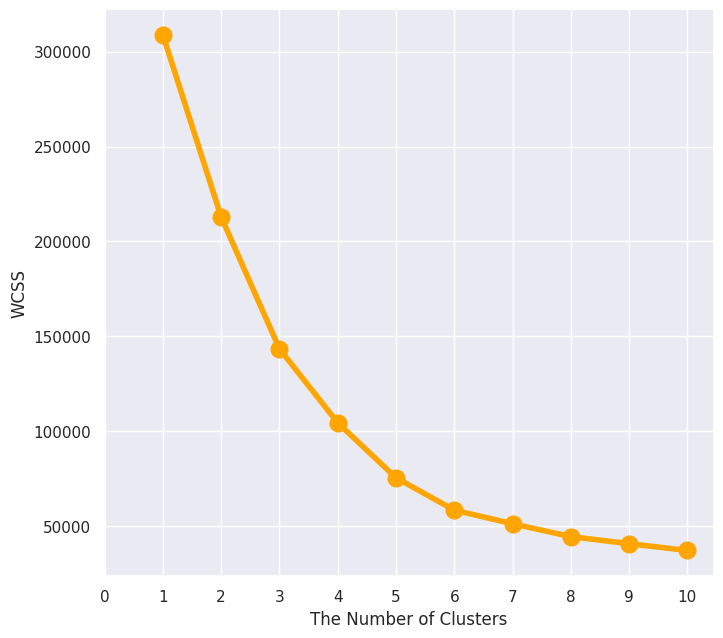

In [109]:
# find the optimal number of clusters using elbow method  -- >This is for 3 features = [age,anual income,spending score]

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(y)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'orange')
plt.xticks(np.arange(11))
plt.xlabel("The Number of Clusters")
plt.ylabel("WCSS")
plt.show()

*From the above elbow method, we can see that the optimal number of clusters == 5*

**Visualizing a 3D Scatter PLot using Matplotlib**

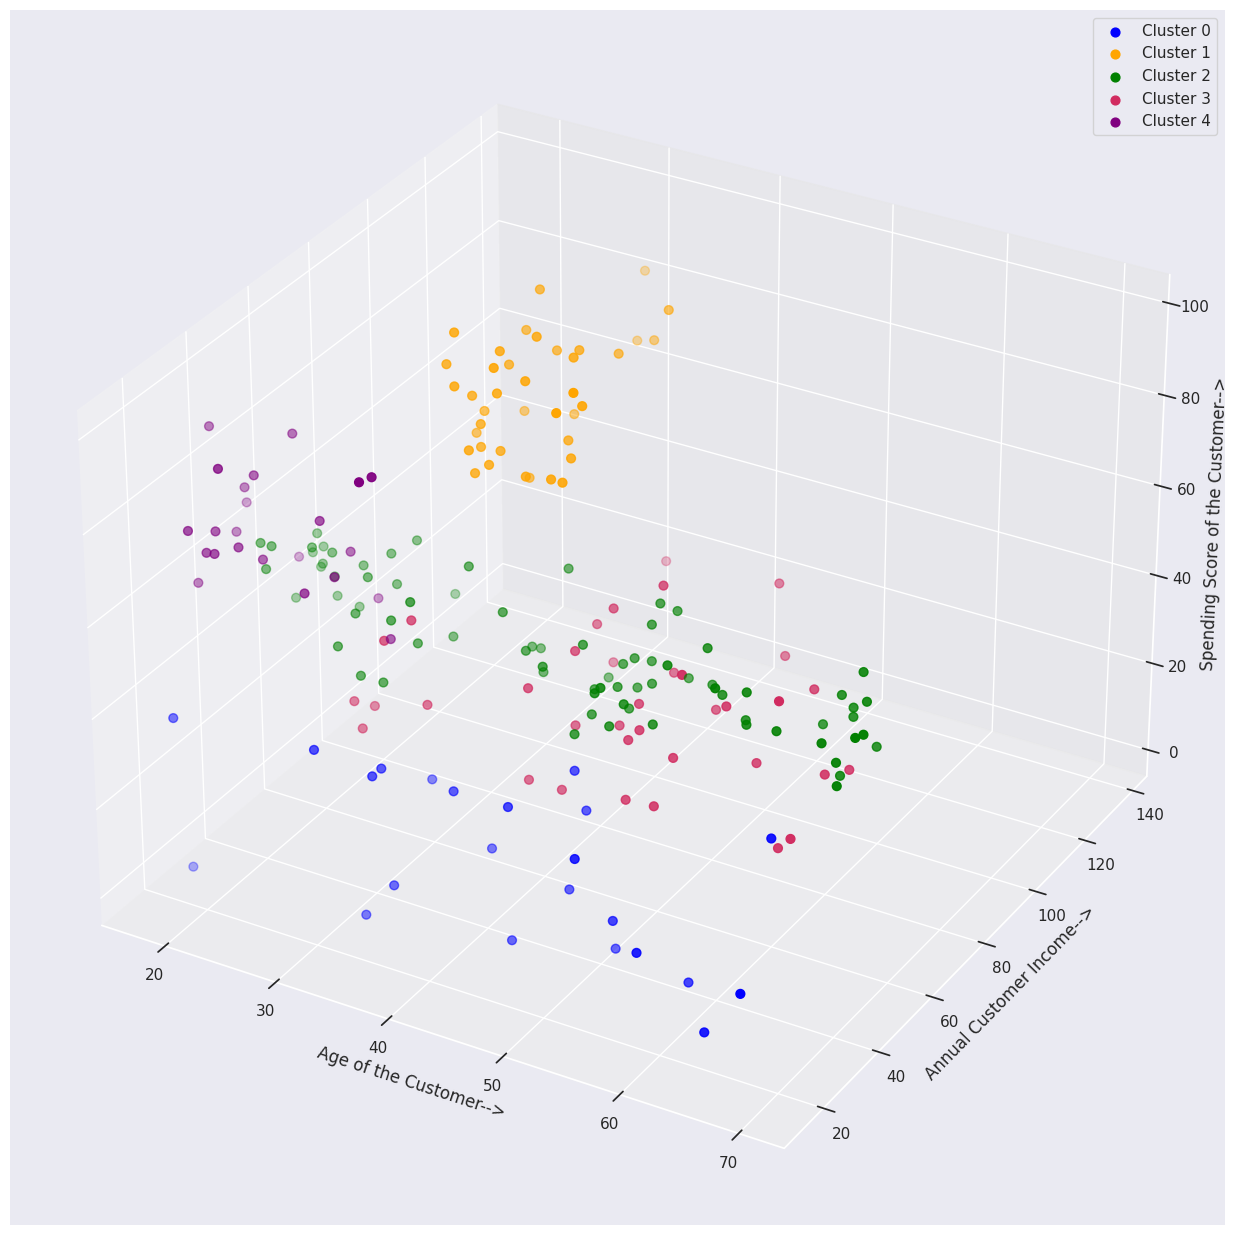

In [116]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y[clusters == 0,0],y[clusters == 0,1],y[clusters == 0,2], s = 40 , color = 'blue', label = "Cluster 0")
ax.scatter(y[clusters == 1,0],y[clusters == 1,1],y[clusters == 1,2], s = 40 , color = 'orange', label = "Cluster 1")
ax.scatter(y[clusters == 2,0],y[clusters == 2,1],y[clusters == 2,2], s = 40 , color = 'green', label = "Cluster 2")
ax.scatter(y[clusters == 3,0],y[clusters == 3,1],y[clusters == 3,2], s = 40 , color = '#D12B60', label = "Cluster 3")
ax.scatter(y[clusters == 4,0],y[clusters == 4,1],y[clusters == 4,2], s = 40 , color = 'purple', label = "Cluster 4")
ax.set_xlabel('Age of the Customer-->')
ax.set_ylabel('Annual Customer Income-->')
ax.set_zlabel('Spending Score of the Customer-->')
ax.legend()
plt.show()

**Hierarchical Clustering**

**Agglomerative**

*We will be looking at a clustering technique, which is Agglomerative Hierarchical Clustering. Agglomerative is the bottom up approach which is more popular than Divisive clustering.*

*We will also be using Complete Linkage as the Linkage Criteria.*

*The Agglomerative Clustering class will require two inputs:*

*n_clusters: The number of clusters to form as well as the number of centroids to generate.*

*linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.*

*Value will be: 'complete'*

*Note: It is recommended that try everything with 'average' as well

*

<Figure size 1200x800 with 0 Axes>

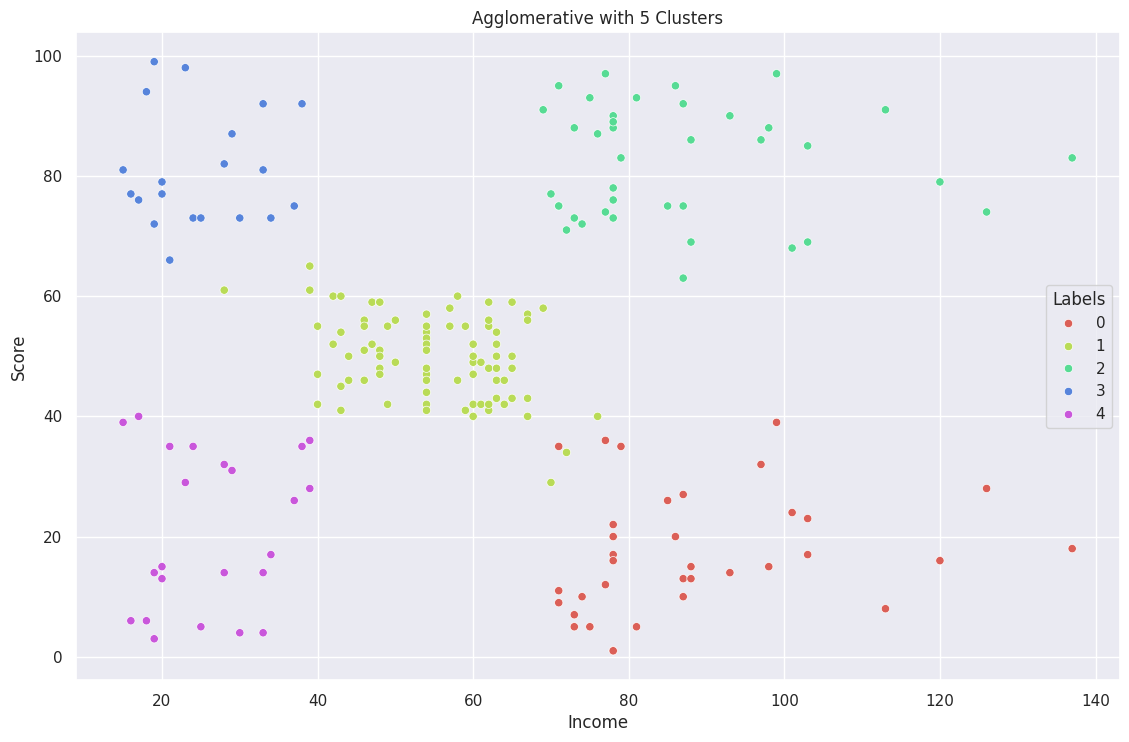

In [119]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(dataset_2)

dataset_2['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=dataset_2['Income'], y=dataset_2['Score'], hue=dataset_2['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative with 5 Clusters')
plt.show()

**Dendrogram Associated for the Agglomerative Hierarchical Clustering**

*Remember that a distance matrix contains the distance from each point to every other point of a dataset .*

*We can use the function distance_matrix, which requires two inputs. Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct.*

In [120]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist = distance_matrix(X, X)
print(dist)

[[  0.          42.04759208  33.03028913 ... 117.1110584  124.47489707
  130.15759678]
 [ 42.04759208   0.          75.01333215 ... 111.7631424  137.74614332
  122.34786471]
 [ 33.03028913  75.01333215   0.         ... 129.87686476 122.18428704
  143.77065069]
 ...
 [117.1110584  111.7631424  129.87686476 ...   0.          57.07013229
   14.35270009]
 [124.47489707 137.74614332 122.18428704 ...  57.07013229   0.
   65.03076195]
 [130.15759678 122.34786471 143.77065069 ...  14.35270009  65.03076195
    0.        ]]


*Using the linkage class from hierarchy, pass in the parameters:*

*The distance matrix*

*'complete' for complete linkage*

**DBSCAN (Density Based Clustering) Clustering**

*Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision.*

*However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor. Additionally, Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.*

*In this part, the main focus will be manipulating the data and properties of DBSCAN and observing the resulting clustering.*

*Modeling DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common clustering algorithms which works based on density of object. The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.*

*It works based on two parameters: Epsilon and Minimum Points*

*Epsilon determine a specified radius that if includes enough number of points within, we call it dense area*

*minimumSamples determine the minimum number of data points we want in a neighborhood to define a cluster*

<Figure size 1200x800 with 0 Axes>

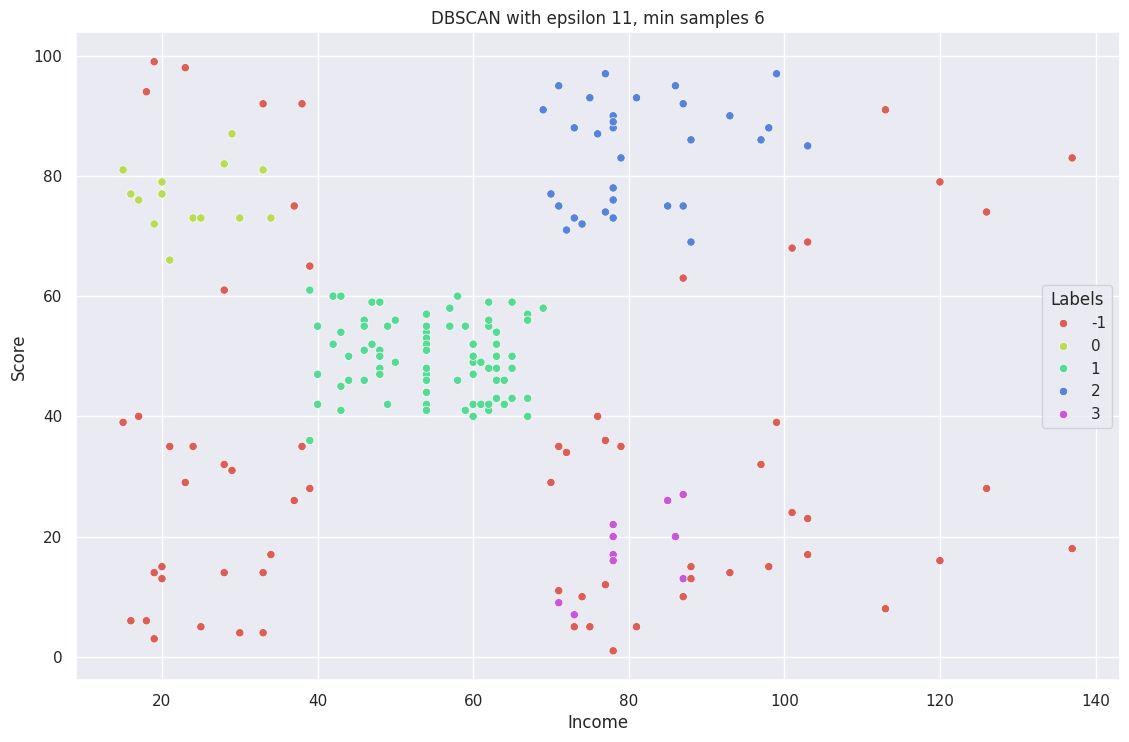

In [122]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=11, min_samples=6).fit(dataset_2)

dataset_2['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=dataset_2['Income'], y=dataset_1['Score'], hue=dataset_2['Labels'],
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

*As we can see DBSCAN doesn't perform very well because the density in our data is not that strong. Label -1 means outliers so it will appear most as outliers. We may have performed better if we had had a bigger data.*

**Mean Shift Algorithm**

*MeanShift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.*

*The algorithm automatically sets the number of clusters, instead of relying on a parameter bandwidth, which dictates the size of the region to search through. This parameter can be set manually, but can be estimated using the provided estimate_bandwidth function, which is called if the bandwidth is not set.*

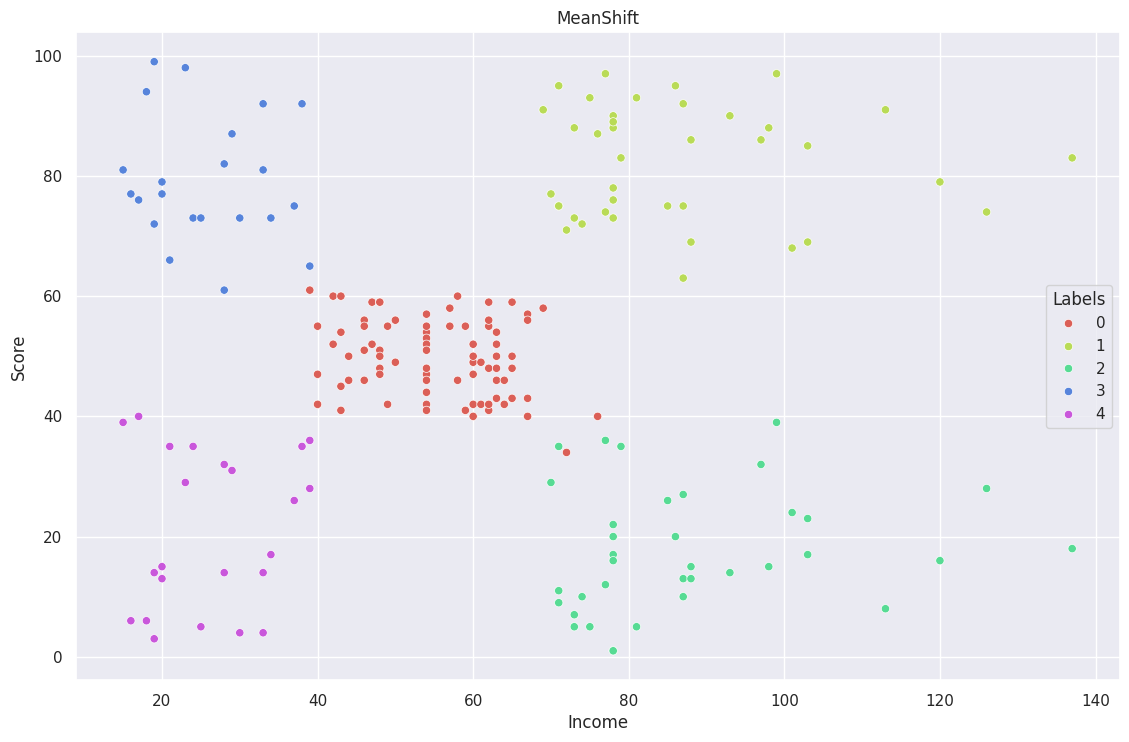

In [125]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(dataset_2, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth)
ms.fit(dataset_2)

dataset_2['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x=dataset_2['Income'],y= dataset_2['Score'], hue=dataset_2['Labels'],
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

**Visualizing All the ALgorithms to Check their Clustering Distributions**

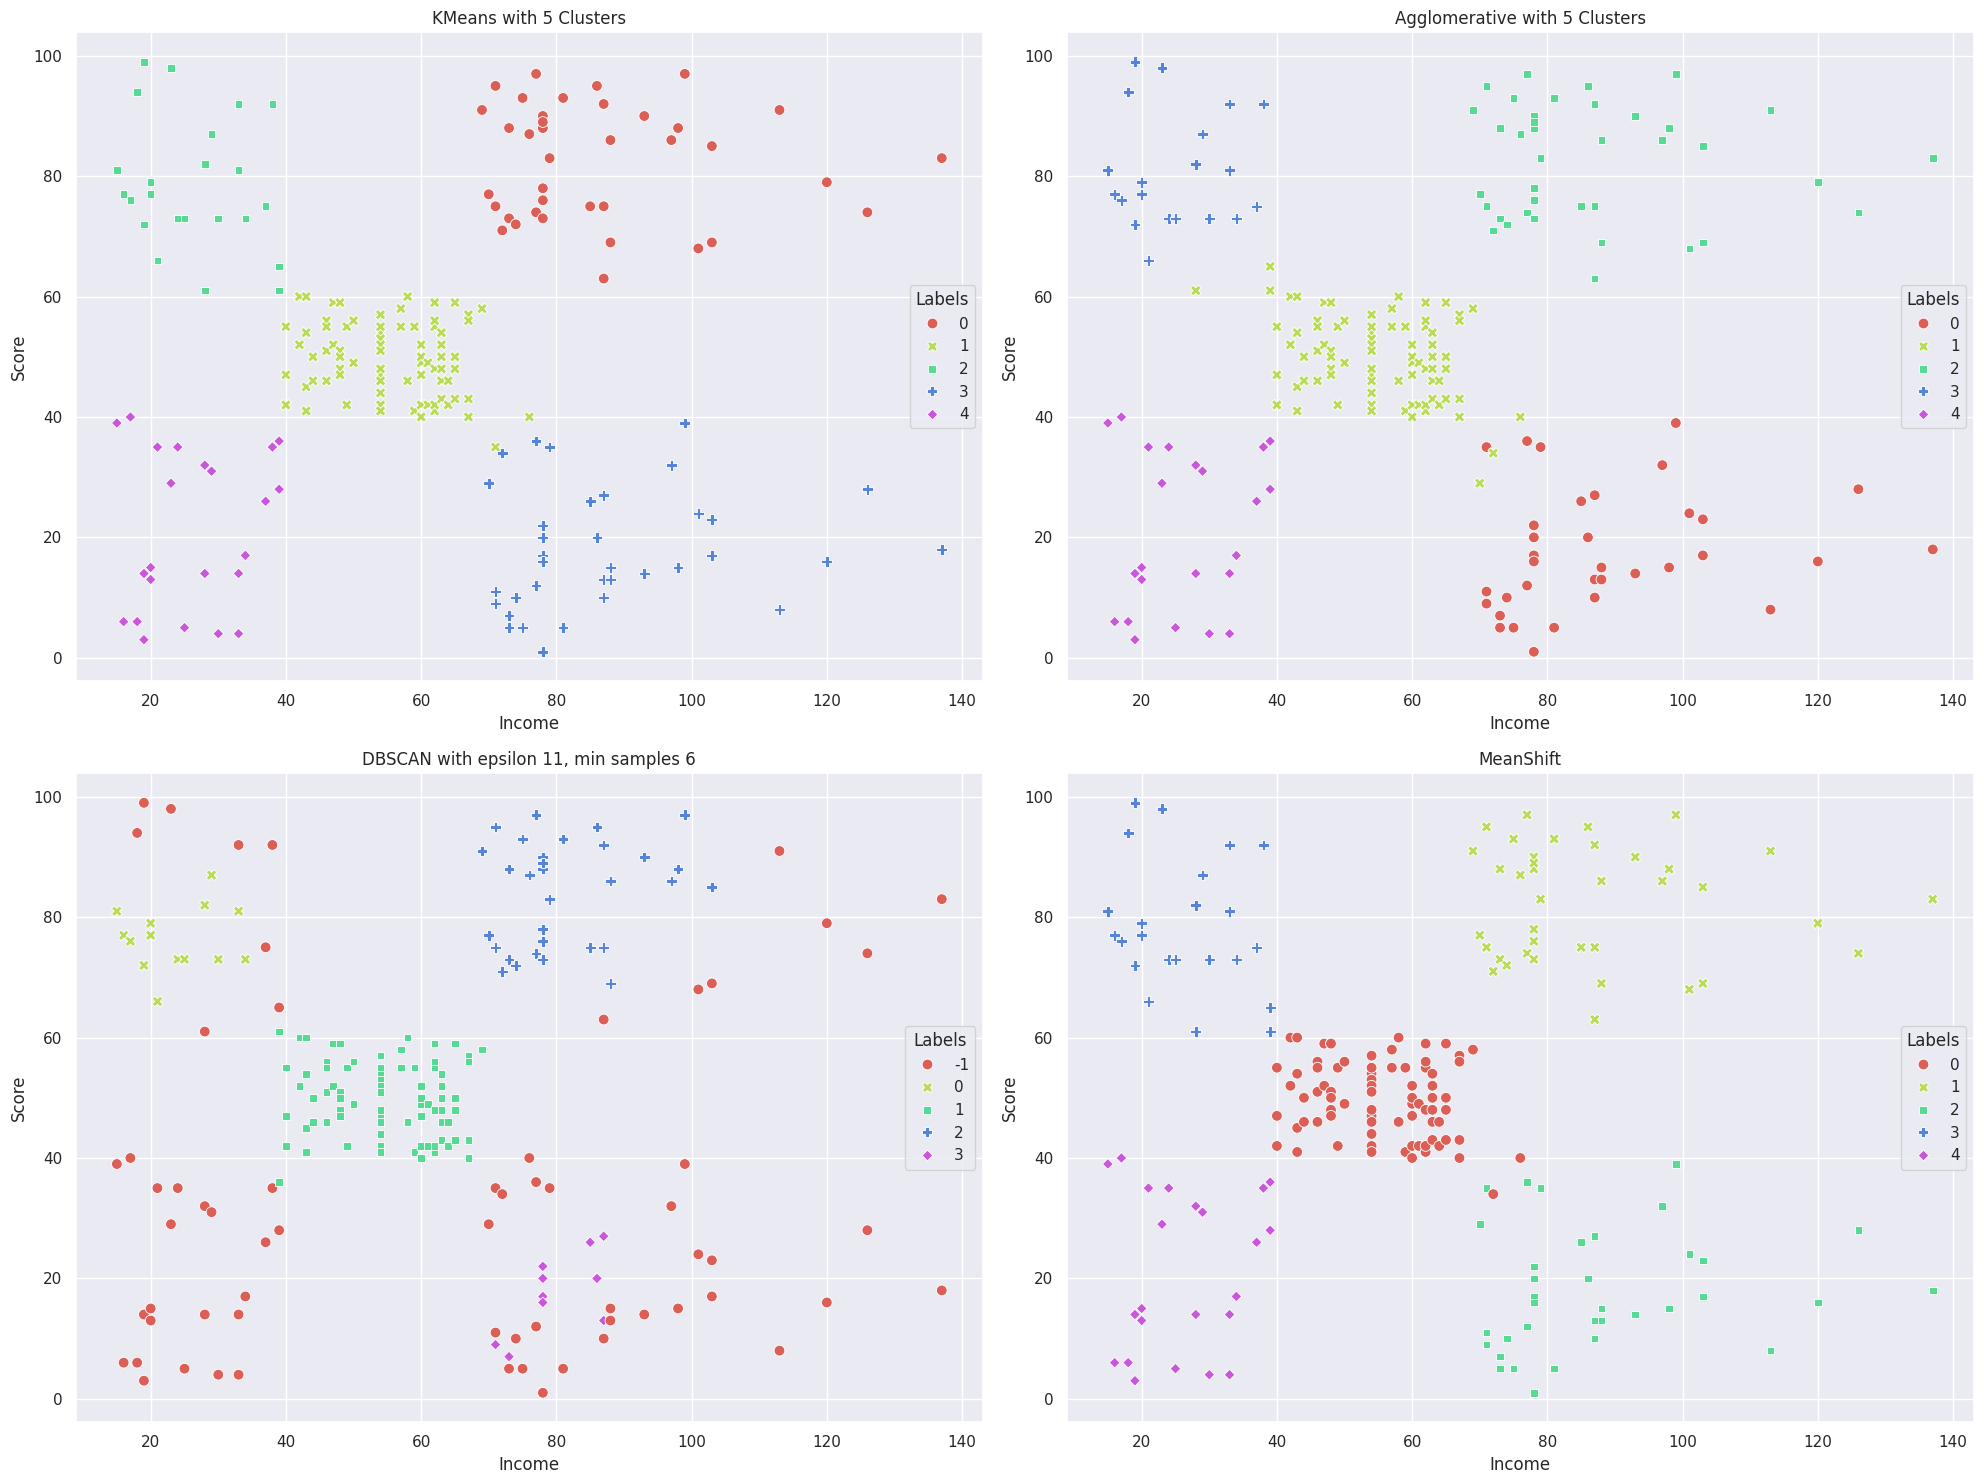

In [126]:
fig = plt.figure(figsize=(20,15))

##### KMeans #####
ax = fig.add_subplot(221)

km5 = KMeans(n_clusters=5).fit(dataset_2)
dataset_2['Labels'] = km5.labels_
sns.scatterplot(x=X['Income'], y=dataset_2['Score'], hue=dataset_2['Labels'], style=dataset_2['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('KMeans with 5 Clusters')


##### Agglomerative Clustering #####
ax = fig.add_subplot(222)

agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(dataset_2)
dataset_2['Labels'] = agglom.labels_
sns.scatterplot(x=dataset_2['Income'],y= dataset_2['Score'], hue=dataset_2['Labels'], style=dataset_2['Labels'],
                palette=sns.color_palette('hls', 5), s=60, ax=ax)
ax.set_title('Agglomerative with 5 Clusters')

##### DBSCAN #####
ax = fig.add_subplot(223)

db = DBSCAN(eps=11, min_samples=6).fit(X)
X['Labels'] = db.labels_
sns.scatterplot(x=X['Income'], y=X['Score'], hue=X['Labels'], style=X['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]), ax=ax)
ax.set_title('DBSCAN with epsilon 11, min samples 6')


##### MEAN SHIFT #####
ax = fig.add_subplot(224)

bandwidth = estimate_bandwidth(dataset_2, quantile=0.1)
ms = MeanShift(bandwidth=bandwidth).fit(dataset_2)
dataset_2['Labels'] = ms.labels_
sns.scatterplot(x=dataset_2['Income'], y=dataset_2['Score'], hue=dataset_2['Labels'], style=dataset_2['Labels'], s=60,
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]), ax=ax)
ax.set_title('MeanShift')

plt.tight_layout()
plt.show()
